# Monte Carlo - wyznaczanie liczby PI
### Import bibliotek podstawowych

In [85]:
import numpy as np
from matplotlib import pyplot as plt

### Funkcja estymująca liczbę PI
- wylosuj wartość dla X z przedziału (-1, 1)
- wylosuj wartość dla Y z przedziału (-1, 1)

jeżeli punkt o tych współżędnych znajduje się w okręgu jednostkowym (x^2 + y^2 = 1) to inkrementujemy zmienną "circle_points"

obliczamy wartość PI ze wzoru  4 * circle_points / samples

In [86]:
def sawblade_rng(x0, z, n):
  x_next = x0
  output = np.empty(n)

  for i in range(0, n):
    x_next = x_next * z - np.floor(x_next * z)
    output[i] = x_next

  return output


def modulo_rng(x0, a, c, m, n):
  x_vec = np.empty(len(a)).transpose()

  if x_vec.size != 0:
    x_vec[0] = x0

  output = np.empty(n)

  for i in range(0, n):
    x_next = (a @ x_vec + c) % m
    x_vec = np.roll(x_vec, 1)
    output[i] = x_vec[0] = x_next

  return output

In [87]:
def find_pi(samples):
  circle_points = 0
  rand_x = sawblade_rng(0.2137, 47, samples) * 2 - 1
  rand_y = sawblade_rng(0.2137, 21, samples) * 2 - 1
  distance = np.power(rand_x, 2) + np.power(rand_y, 2)

  for point in distance:
    if point <= 1:
      circle_points += 1

  pi = 4 * circle_points / samples
  return pi


samples = 5000000  # około 17s
pi = find_pi(samples)
print("Samples:", samples)
print("Final estimation of Pi:", pi)  
print("Real Pi value:", np.pi)  
print("Error:", np.abs(pi - np.pi))

Samples: 5000000
Final estimation of Pi: 3.1421064
Real Pi value: 3.141592653589793
Error: 0.0005137464102067391


### Wizualizacja estymacji liczby PI

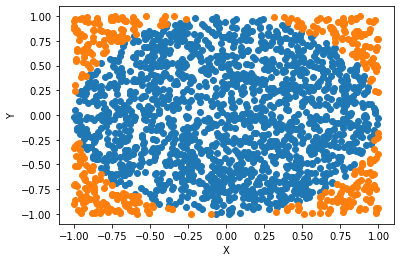

In [88]:
count = 2000
circle_points_x = []
circle_points_y = []
not_circle_points_x = []
not_circle_points_y = []

rand_x = sawblade_rng(0.2137, 47, count) * 2 - 1
rand_y = sawblade_rng(0.2137, 21, count) * 2 - 1
distance = rand_x**2 + rand_y**2

for i in range(distance.size):
  if distance[i] <= 1:
    circle_points_x.append(rand_x[i])
    circle_points_y.append(rand_y[i])
  else:
    not_circle_points_x.append(rand_x[i])
    not_circle_points_y.append(rand_y[i])


fig, (ax) = plt.subplots(1, 1)
ax.plot(circle_points_x, circle_points_y, 'o')
ax.plot(not_circle_points_x, not_circle_points_y, 'o')
ax.set_ylabel('Y')
ax.set_xlabel('X')
plt.show()

### Błąd estymacji w zależności od ilości iteracji

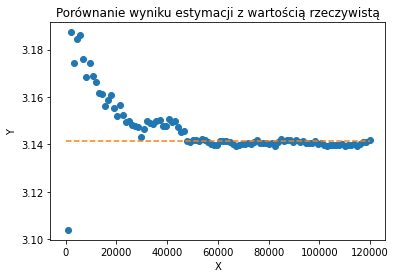

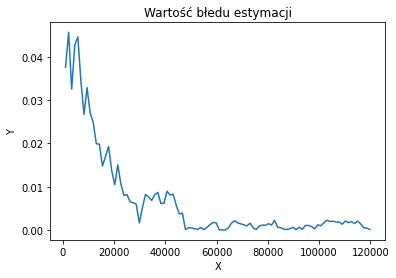

In [91]:
count = 120000
results = []
error = []
samples = np.arange(1000, count, int(count/100))

f = lambda samples: find_pi(samples)

for i in samples:
  results.append(f(i))

for result in results:
  error.append(abs(result - np.pi))


x = np.linspace(0, count)

fig, (ax) = plt.subplots(1, 1)
ax.plot(samples, results, 'o')
ax.plot(x, x*0 + np.pi, linestyle='dashed')
ax.set_ylabel('Y')
ax.set_xlabel('X')
ax.set_title("Porównanie wyniku estymacji z wartością rzeczywistą")

fig2, (ax2) = plt.subplots(1, 1)
ax2.plot(samples, error, '-')
ax2.set_ylabel('Y')
ax2.set_xlabel('X')
ax2.set_title("Wartość błedu estymacji")

plt.show() # czas trwania ~35s